## KNN - Predict whether a person is at risk of Heart Diseaase

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [59]:
#umport the metrics class
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [60]:
#Prevent bias of large numbers -distance
from sklearn.preprocessing import StandardScaler

In [61]:
#import the class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
#import feature selection class
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

### Load the data

In [63]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


 **Dataset has no missing values**

Text(0.5, 1.0, 'Distribution of Features')

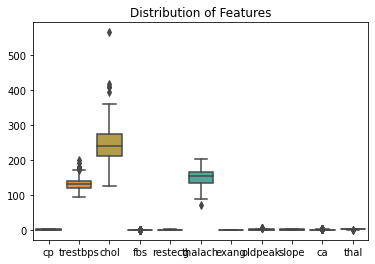

In [66]:
distdf = df.iloc[:,2:13]
b_plot = sns.boxplot(data=distdf)
b_plot.set_title("Distribution of Features")


An **outlier** present in **chol**. Chose not to correct for this because it is a viable data point.

In [67]:
#Separate features and outcome
x = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [68]:
x_array = df.values[:,0:13]

In [69]:
#Get a possible value of k for the features
import math
#squareroot of n
math.sqrt(len(x_array[1]))

3.605551275463989

choose k as 3

In [70]:
# Split into training and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [71]:
#Feature scaling using the z scores
sc_x =StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

**Another osssible feature selection method**       
selector = SelectKBest(chi2, k=3)          
chi_best = selector.fit_transform(x,y)

In [72]:
#feature selection function
def select_features(x_train,y_train, x_test):
    #select all features
    fvalue_selector = SelectKBest(score_func=f_classif, k=9)
    #learn relationship from taining data
    fvalue_selector.fit(x_train, y_train)
    #Transform  train input
    x_train_fv = fvalue_selector.transform(x_train)
    #Transform test input
    x_test_fv = fvalue_selector.transform(x_test)
    
    return x_train_fv, x_test_fv, fvalue_selector

In [73]:
#Call the function
x_train_fv, x_test_fv, fvalue_selector = select_features(x_train, y_train, x_test)

In [74]:
print(x.shape[1])
print(x_train_fv.shape[1])

13
9


In [75]:
#The f statistic scores as pandas dataframe
dfscores =pd.DataFrame(fvalue_selector.scores_)
dfcols =pd.DataFrame(x.columns)

feature_scores =pd.concat([dfcols,dfscores], axis =1)
feature_scores.columns = ['Features', 'Scores']

feature_scores

,Features,Scores
0,age,13.875305
1,sex,24.465910
2,cp,47.864616
3,trestbps,2.637349
4,chol,0.802091
5,fbs,0.000205
6,restecg,1.706731
7,thalach,43.948281
8,exang,58.671542
9,oldpeak,60.030507


In [76]:
#Get the value of k for the model
import math
#squareroot of n
math.sqrt(len(y_test))

7.810249675906654

In [77]:
#Define the model - Init KNN
classifier = KNeighborsClassifier(n_neighbors =7, p=2, metric ='euclidean')

#Tain the model
classifier.fit(x_train_fv, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric ='euclidean',
                     metric_params= None, n_jobs=1,n_neighbors =7, p=2, 
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_jobs=1, n_neighbors=7)

In [78]:
 # Predict on dataset which model has not seen before 
predictions = classifier.predict(x_test_fv)
predictions

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
#Calculate the accuracy of the model accuracy
accuracy_score = metrics.accuracy_score(y_test, predictions)
print('Accuracy Score = ', round(accuracy_score,2))

Accuracy Score =  0.87


In [80]:
#Generate a confusin matrix
confusion_matrix = pd.crosstab(y_test, predictions,rownames=['Actual'],
                               colnames=['Predicted'])

TN = confusion_matrix.iloc[0,0]
FN = confusion_matrix.iloc[0,1]
TP = confusion_matrix.iloc[1,1]
FP = confusion_matrix.iloc[1,0]

confusion_matrix

Predicted,0,1
Actual,,
0,25,4
1,4,28


In [81]:
# Print the TN, FN, TP, FP values
print('True Negative =',TN)
print('False Negative =',FN)
print('True Positive =',TP)
print('False Positive =',FP)

True Negative = 25
False Negative = 4
True Positive = 28
False Positive = 4


In [82]:
# 9: Print the model precision value
# Precision is the ratio of  tp / (tp + fp)
myprecision = TP / (TP + FP)
print('Precision = ', round(myprecision,4))

Precision =  0.875


In [83]:
# Recall = the ratio tp / (tp + fn) 
myrecall = TP / (TP + FN)
print('Sensitivity or Recall = ', round(myrecall,4))

Sensitivity or Recall =  0.875


In [84]:
# Error ate
myerr = (FP+FN) / (TP + FP +TN +FN)
print('Error rate = ', round(myerr,2))

Error rate =  0.13


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

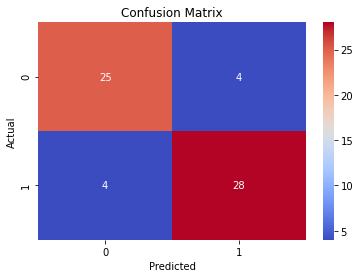

In [85]:
#11: Visualize the confusion matrix with a Heatmap 
ax = plt.axes()
ax.set_title('Confusion Matrix')
sns.heatmap(confusion_matrix, cmap='coolwarm', annot=True)

In [86]:
f1_score = metrics.f1_score(y_test, predictions)
print('The f1 Score = ', round(f1_score,2))

The f1 Score =  0.88
